#  Lab Assignment-7: Regression Techniques

###  Problem Statement:
**Implement Regression Technique and evaluate its performance.**

###  Reference:
[Pierian Training - 7 Machine Learning Regression Algorithms](https://pieriantraining.com/7-machine-learning-regression-algorithms-python/)

In [ ]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix, classification_report

In [ ]:
# Load Dataset (Graduate Admission Prediction)
url = "https://raw.githubusercontent.com/divyansha1115/Graduate-Admission-Prediction/master/Admission_Predict.csv"
data = pd.read_csv(url)
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [ ]:
#  Data Preprocessing
data = data.drop(columns=['Serial No.'])
X = data.drop("Chance of Admit ", axis=1)
y = data["Chance of Admit "]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
#  Linear Regression
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)
y_pred_lin = lin_model.predict(X_test)

print("Linear Regression Performance:")
print("MSE:", mean_squared_error(y_test, y_pred_lin))
print("R2 Score:", r2_score(y_test, y_pred_lin))

Linear Regression Performance:
MSE: 0.004652821846481298
R2 Score: 0.7955991554684618


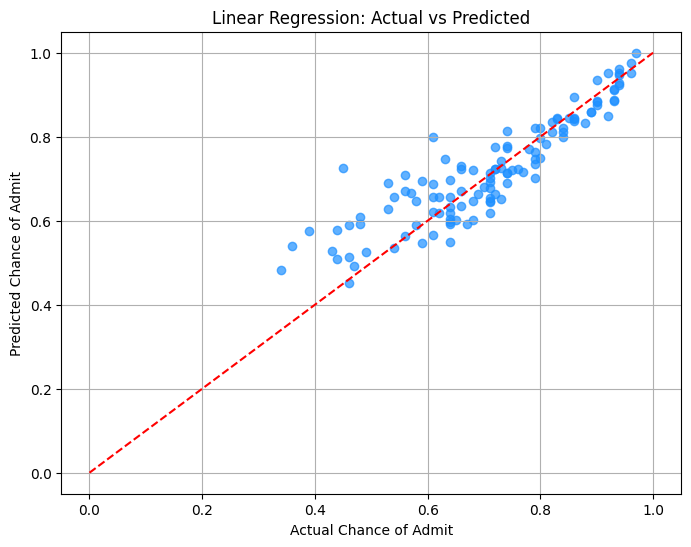

In [ ]:
#  Linear Regression Visualization - Predicted vs Actual
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_lin, color='dodgerblue', alpha=0.7)
plt.plot([0, 1], [0, 1], 'r--')  # reference line
plt.xlabel("Actual Chance of Admit")
plt.ylabel("Predicted Chance of Admit")
plt.title("Linear Regression: Actual vs Predicted")
plt.grid(True)
plt.show()


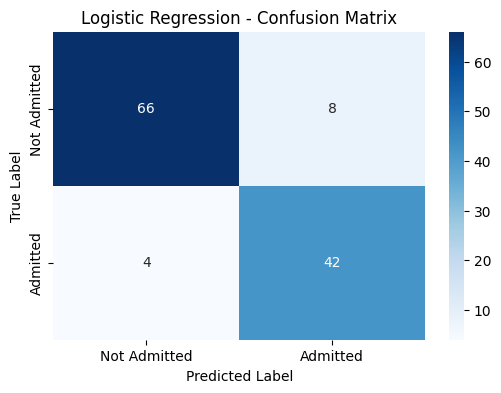

In [ ]:
#  Convert target into binary classification
y_class = np.where(y >= 0.75, 1, 0)
y_train_class = np.where(y_train >= 0.75, 1, 0)
y_test_class = np.where(y_test >= 0.75, 1, 0)

# Logistic Regression
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train_class)
y_pred_class = log_model.predict(X_test)

#  Confusion Matrix Heatmap
cm = confusion_matrix(y_test_class, y_pred_class)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Admitted', 'Admitted'], yticklabels=['Not Admitted', 'Admitted'])
plt.title("Logistic Regression - Confusion Matrix")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()


In [ ]:
#  Ridge Regression (L2 Regularization)
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)

print("Ridge Regression Performance:")
print("MSE:", mean_squared_error(y_test, y_pred_ridge))
print("R2 Score:", r2_score(y_test, y_pred_ridge))

Ridge Regression Performance:
MSE: 0.004659852135364352
R2 Score: 0.7952903112804809


In [ ]:
# Lasso Regression (L1 Regularization)
lasso = Lasso(alpha=0.01)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)

print("Lasso Regression Performance:")
print("MSE:", mean_squared_error(y_test, y_pred_lasso))
print("R2 Score:", r2_score(y_test, y_pred_lasso))

Lasso Regression Performance:
MSE: 0.006193385586376801
R2 Score: 0.7279214020794205


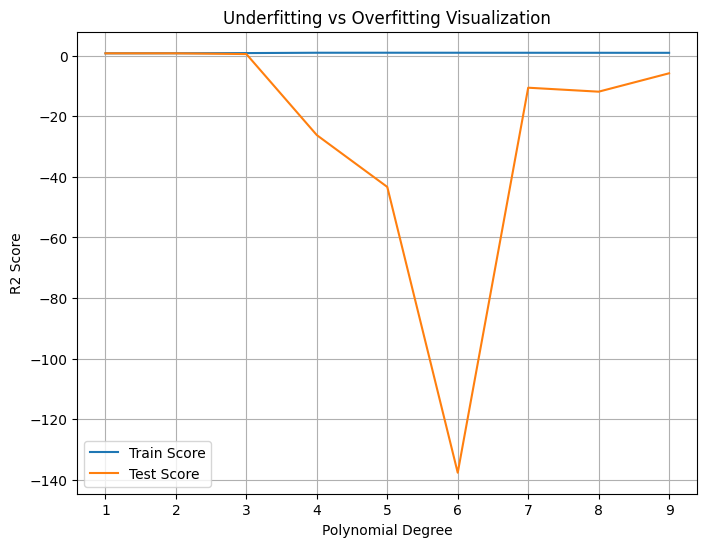

In [ ]:
#  Visualizing Underfitting / Overfitting using Polynomial Degree
from sklearn.preprocessing import PolynomialFeatures

train_score = []
test_score = []
for d in range(1, 10):
    poly = PolynomialFeatures(degree=d)
    X_poly_train = poly.fit_transform(X_train)
    X_poly_test = poly.transform(X_test)
    model = LinearRegression()
    model.fit(X_poly_train, y_train)
    train_score.append(model.score(X_poly_train, y_train))
    test_score.append(model.score(X_poly_test, y_test))

plt.figure(figsize=(8,6))
plt.plot(range(1,10), train_score, label='Train Score')
plt.plot(range(1,10), test_score, label='Test Score')
plt.xlabel('Polynomial Degree')
plt.ylabel('R2 Score')
plt.title('Underfitting vs Overfitting Visualization')
plt.legend()
plt.grid(True)
plt.show()